<a href="https://colab.research.google.com/github/ziedjouini/Linear_Regression_Activities/blob/main/Copie_de_Projet_2_zied_Olist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importer les données

Exécutes les cellules ci-dessous pour récupérer les tables de données.

In [ ]:
import requests
import zipfile
import sqlite3
import pandas as pd
#import seaborn as sns
import seaborn as sns

# Ici, nous téléchargeons le fichier de GitHub 
r = requests.get('https://github.com/murpi/olist/blob/master/olist.sqlite.zip?raw=true')
open('olist.sqlite.zip', 'wb').write(r.content)

# Puis on le décompresse
with zipfile.ZipFile("olist.sqlite.zip","r") as zip_ref:
    zip_ref.extractall()

# Nous nous connectons à la base de données
conn = sqlite3.connect('olist.sqlite')



In [ ]:
# Voici une requête spécifique pour lister le nom des tables
cursor = conn.cursor()
schema = cursor.execute("SELECT * FROM sqlite_master where type='table'").fetchall()
pd.DataFrame(schema, columns = ["type", "name", "table_name", "rootpage", "SQL"])

,type,name,table_name,rootpage,SQL
0,table,customers_dataset,customers_dataset,2,"CREATE TABLE ""customers_dataset"" (\n\t""custome..."
1,table,product_category_name_translation,product_category_name_translation,2236,"CREATE TABLE ""product_category_name_translatio..."
2,table,sellers_dataset,sellers_dataset,2237,"CREATE TABLE ""sellers_dataset"" (\n\t""seller_id..."
3,table,products_dataset,products_dataset,2282,"CREATE TABLE ""products_dataset"" (\n\t""product_..."
4,table,orders_dataset,orders_dataset,2859,"CREATE TABLE ""orders_dataset"" (\n\t""order_id""\..."
5,table,order_reviews_dataset,order_reviews_dataset,7391,"CREATE TABLE ""order_reviews_dataset"" (\n\t""rev..."
6,table,order_payments_dataset,order_payments_dataset,11053,"CREATE TABLE ""order_payments_dataset"" (\n\t""or..."
7,table,order_items_dataset,order_items_dataset,12645,"CREATE TABLE ""order_items_dataset"" (\n\t""order..."
8,table,geolocation_dataset,geolocation_dataset,16680,"CREATE TABLE ""geolocation_dataset"" (\n\t""geolo..."


In [ ]:
# Et maintenant nous pouvons afficher avec Pandas le résultat de n'importe quelle requête
# Par exemple :
pd.read_sql("select * from geolocation_dataset ", conn)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [ ]:

customers_dataset_sql = pd.read_sql("select * from customers_dataset", conn)


#########


In [ ]:
# 0))table (0) :customers_dataset
customers=customers_dataset=pd.read_sql("select * from customers_dataset ", conn)
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


**ici montre il y a plus de customers dans l'état de sao paulo**

In [ ]:
customers["customer_state"].value_counts()

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_state, dtype: int64

In [ ]:
customers["customer_state"].value_counts(normalize=True)*100

SP    41.980672
RJ    12.924247
MG    11.700405
RS     5.496727
PR     5.073360
SC     3.657445
BA     3.399000
DF     2.152030
ES     2.044428
GO     2.031355
PE     1.661287
CE     1.343510
PA     0.980481
MT     0.912099
MA     0.751199
MS     0.719019
PB     0.539013
PI     0.497783
RN     0.487726
AL     0.415322
SE     0.351967
TO     0.281574
RO     0.254422
AM     0.148832
AC     0.081455
AP     0.068382
RR     0.046259
Name: customer_state, dtype: float64

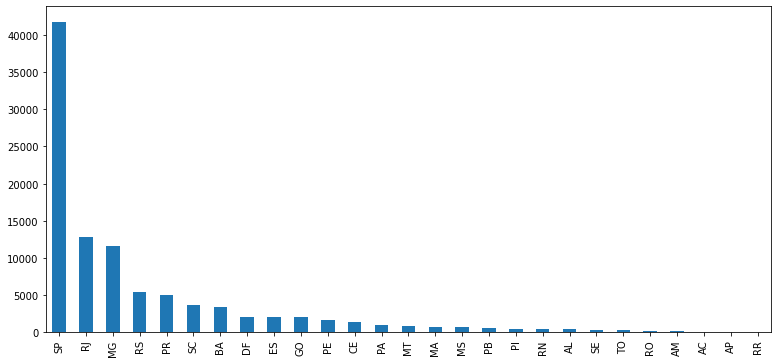

In [ ]:
customers["customer_state"].value_counts().plot.bar(figsize=(13,6))

In [ ]:
# 1)) table (1) : product_category_name_translation	
product_category_name_translation=pd.read_sql("select * from product_category_name_translation ", conn)
product_category_name_translation

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [ ]:
#2)) table (2)):sellers_dataset
sellers=sellers_dataset=pd.read_sql("select * from sellers_dataset ", conn)
sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


**montre il y a plus des vendeurs dans l'état de sao paulo**

In [ ]:
sellers["seller_state"].value_counts()

SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
RN       5
MS       5
MT       4
RO       2
SE       2
PI       1
AC       1
MA       1
AM       1
PA       1
Name: seller_state, dtype: int64

In [ ]:
sellers["seller_state"].value_counts(normalize=True)*100

SP    59.741519
PR    11.276252
MG     7.883683
SC     6.138934
RJ     5.525040
RS     4.168013
GO     1.292407
DF     0.969305
ES     0.743134
BA     0.613893
CE     0.420032
PE     0.290792
PB     0.193861
RN     0.161551
MS     0.161551
MT     0.129241
RO     0.064620
SE     0.064620
PI     0.032310
AC     0.032310
MA     0.032310
AM     0.032310
PA     0.032310
Name: seller_state, dtype: float64

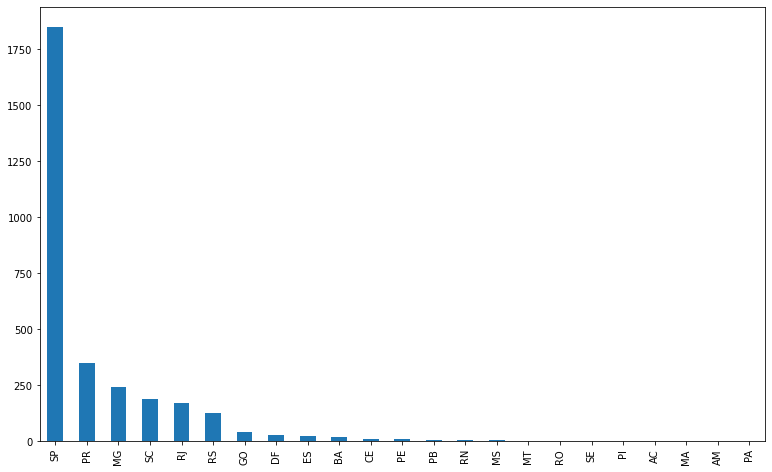

In [ ]:
sellers["seller_state"].value_counts().plot.bar(figsize=(13,8))

In [ ]:
#3) table (3)) :products_dataset
products=products_dataset=pd.read_sql("select * from products_dataset ", conn)
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [ ]:
products['product_volume_cm3']=products['product_length_cm']*products['product_height_cm']*products['product_width_cm']
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2240.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10800.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,2430.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,2704.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,4420.0
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,64000.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,4864.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,5103.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,8060.0


**les produits les plus commandées**

In [ ]:
products["product_category_name"].value_counts()

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

In [ ]:
products["product_category_name"].value_counts(normalize=True)*100

cama_mesa_banho                  9.365820
esporte_lazer                    8.864908
moveis_decoracao                 8.215578
beleza_saude                     7.556971
utilidades_domesticas            7.219938
                                   ...   
fashion_roupa_infanto_juvenil    0.015460
casa_conforto_2                  0.015460
pc_gamer                         0.009276
seguros_e_servicos               0.006184
cds_dvds_musicais                0.003092
Name: product_category_name, Length: 73, dtype: float64

In [ ]:
#4)) table (4)) :orders_dataset	
orders=orders_dataset=pd.read_sql("select * from orders_dataset	 ", conn)
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [ ]:
orders.isna().any()

order_id                         False
customer_id                      False
order_status                     False
order_purchase_timestamp         False
order_approved_at                 True
order_delivered_carrier_date      True
order_delivered_customer_date     True
order_estimated_delivery_date    False
dtype: bool

**il y a des NaN "order_approved_at" ,"order_delivered_carrier_date   "order_delivered_customer_date"**

In [ ]:
orders.loc[:,"order_status"].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [ ]:
orders.loc[:,"order_status"].value_counts(normalize=True)*100

delivered      97.020344
shipped         1.113223
canceled        0.628513
unavailable     0.612423
invoiced        0.315765
processing      0.302692
created         0.005028
approved        0.002011
Name: order_status, dtype: float64

In [ ]:
orders['order_purchase_timestamp']

0        2017-10-02 10:56:33
1        2018-07-24 20:41:37
2        2018-08-08 08:38:49
3        2017-11-18 19:28:06
4        2018-02-13 21:18:39
                ...         
99436    2017-03-09 09:54:05
99437    2018-02-06 12:58:58
99438    2017-08-27 14:46:43
99439    2018-01-08 21:28:27
99440    2018-03-08 20:57:30
Name: order_purchase_timestamp, Length: 99441, dtype: object

In [ ]:
orders['order_purchase_timestamp']

0        2017-10-02 10:56:33
1        2018-07-24 20:41:37
2        2018-08-08 08:38:49
3        2017-11-18 19:28:06
4        2018-02-13 21:18:39
                ...         
99436    2017-03-09 09:54:05
99437    2018-02-06 12:58:58
99438    2017-08-27 14:46:43
99439    2018-01-08 21:28:27
99440    2018-03-08 20:57:30
Name: order_purchase_timestamp, Length: 99441, dtype: object

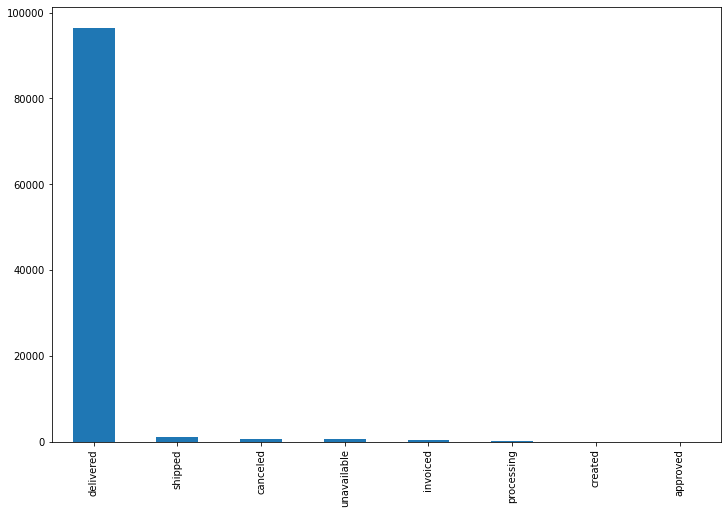

In [ ]:
orders.loc[:,"order_status"].value_counts().plot.bar(figsize=(12,8))

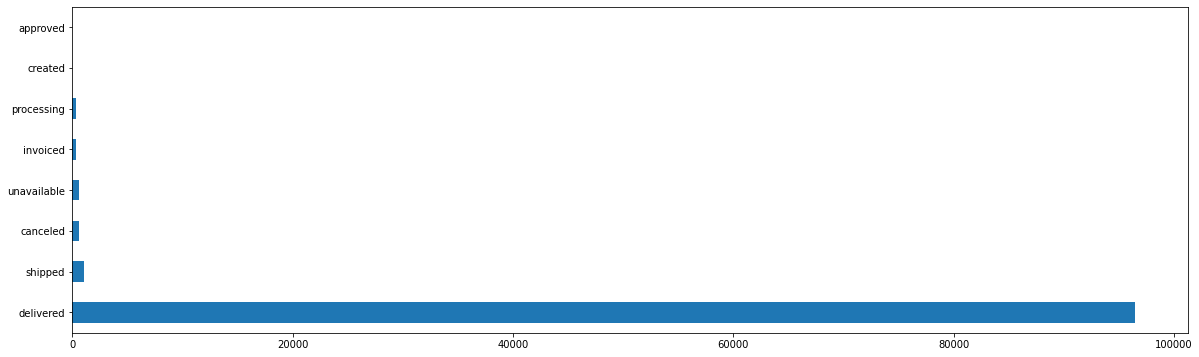

In [ ]:
orders.loc[:,"order_status"].value_counts().plot.barh(figsize=(20,6))

**pour changer le type de**

 *pd.to_datetime(df['date'])*

In [ ]:
orders['order_purchase_timestamp']=pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_purchase_timestamp']

0       2017-10-02 10:56:33
1       2018-07-24 20:41:37
2       2018-08-08 08:38:49
3       2017-11-18 19:28:06
4       2018-02-13 21:18:39
                ...        
99436   2017-03-09 09:54:05
99437   2018-02-06 12:58:58
99438   2017-08-27 14:46:43
99439   2018-01-08 21:28:27
99440   2018-03-08 20:57:30
Name: order_purchase_timestamp, Length: 99441, dtype: datetime64[ns]

In [ ]:
orders['order_month'] = orders['order_purchase_timestamp'].dt.month_name()
orders['order_month']

0         October
1            July
2          August
3        November
4        February
           ...   
99436       March
99437    February
99438      August
99439     January
99440       March
Name: order_month, Length: 99441, dtype: object

In [ ]:
orders['Year'] = orders['order_purchase_timestamp'].dt.year
orders['Year']

0        2017
1        2018
2        2018
3        2017
4        2018
         ... 
99436    2017
99437    2018
99438    2017
99439    2018
99440    2018
Name: Year, Length: 99441, dtype: int64

In [ ]:
orders['day'] = orders['order_purchase_timestamp'].dt.day_name()
orders['day']

0           Monday
1          Tuesday
2        Wednesday
3         Saturday
4          Tuesday
           ...    
99436     Thursday
99437      Tuesday
99438       Sunday
99439       Monday
99440     Thursday
Name: day, Length: 99441, dtype: object

In [ ]:
orders['order_yearmonth'] = orders['order_purchase_timestamp'].dt.strftime('%Y-%m')
orders['order_yearmonth']

0        2017-10
1        2018-07
2        2018-08
3        2017-11
4        2018-02
          ...   
99436    2017-03
99437    2018-02
99438    2017-08
99439    2018-01
99440    2018-03
Name: order_yearmonth, Length: 99441, dtype: object

In [ ]:
orders[['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date','order_delivered_customer_date', 'order_estimated_delivery_date']] = orders[['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date','order_delivered_customer_date', 'order_estimated_delivery_date']].apply(pd.to_datetime)
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_month,Year,day,order_yearmonth
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,October,2017,Monday,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,July,2018,Tuesday,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,August,2018,Wednesday,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,November,2017,Saturday,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,February,2018,Tuesday,2018-02
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,March,2017,Thursday,2017-03
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,February,2018,Tuesday,2018-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,August,2017,Sunday,2017-08
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,January,2018,Monday,2018-01


In [ ]:
#df.sort_values(by='Date')
orders.sort_values(by="order_purchase_timestamp" ,ascending=False)
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_month,Year,day,order_yearmonth
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,October,2017,Monday,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,July,2018,Tuesday,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,August,2018,Wednesday,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,November,2017,Saturday,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,February,2018,Tuesday,2018-02
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,March,2017,Thursday,2017-03
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,February,2018,Tuesday,2018-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,August,2017,Sunday,2017-08
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,January,2018,Monday,2018-01


In [ ]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_month,Year,day,order_yearmonth
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,October,2017,Monday,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,July,2018,Tuesday,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,August,2018,Wednesday,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,November,2017,Saturday,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,February,2018,Tuesday,2018-02
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,March,2017,Thursday,2017-03
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,February,2018,Tuesday,2018-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,August,2017,Sunday,2017-08
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,January,2018,Monday,2018-01


In [ ]:
#5)) table (5) :order_reviews_dataset
order_reviews=order_reviews=pd.read_sql("select * from order_reviews_dataset ", conn)
order_reviews


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,None,None,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,None,None,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,None,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,None,None,2018-07-01 00:00:00,2018-07-02 12:59:13


In [ ]:
order_reviews[['review_creation_date','review_answer_timestamp']]=order_reviews[['review_creation_date','review_answer_timestamp']].apply(pd.to_datetime)
order_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,None,None,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,None,None,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,None,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,None,None,2018-07-01,2018-07-02 12:59:13


In [ ]:
#data['Name'] = data['Name'].str.upper()
order_reviews["review_comment_title"]=order_reviews["review_comment_title"].str.upper()
order_reviews["review_comment_message"]=order_reviews["review_comment_message"].str.upper()

In [ ]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11566 non-null  object        
 4   review_comment_message   40950 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [ ]:
order_reviews.isna().any()

review_id                  False
order_id                   False
review_score               False
review_comment_title        True
review_comment_message      True
review_creation_date       False
review_answer_timestamp    False
dtype: bool

**il y a des NaN = "review_comment_title" et "review_comment_message"**

In [ ]:
#exemple: Apply a lambda function to each column by adding 10 to each value in each column
#modDfObj = dfObj.apply(lambda x : x + 10)
#def myfunction(review_score):
 # if review_score>3:
 #   return "good rating"
 # else:
 #   return "bad rating"
#myfunction(4)

In [ ]:
# Adding the result column
order_reviews['review_score_2'] = order_reviews['review_score'].apply(lambda x: 1 if int(x)>=4 else 0)
order_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_score_2
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18,2018-01-18 21:46:59,1
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10,2018-03-11 03:05:13,1
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17,2018-02-18 14:36:24,1
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,RECEBI BEM ANTES DO PRAZO ESTIPULADO.,2017-04-21,2017-04-21 22:02:06,1
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,PARABÉNS LOJAS LANNISTER ADOREI COMPRAR PELA I...,2018-03-01,2018-03-02 10:26:53,1
...,...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,None,None,2018-07-07,2018-07-14 17:18:30,1
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,None,None,2017-12-09,2017-12-11 20:06:42,1
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,None,"EXCELENTE MOCHILA, ENTREGA SUPER RÁPIDA. SUPER...",2018-03-22,2018-03-23 09:10:43,1
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,None,None,2018-07-01,2018-07-02 12:59:13,1


In [ ]:
order_reviews['review_score'].value_counts()

5    57328
4    19142
1    11424
3     8179
2     3151
Name: review_score, dtype: int64

In [ ]:
order_reviews['review_score'].value_counts(normalize=True)*100

5    57.776344
4    19.291704
1    11.513344
3     8.242965
2     3.175643
Name: review_score, dtype: float64

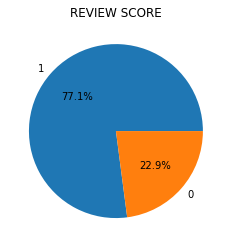

In [ ]:
import matplotlib.pyplot as plt
orders_reviews=order_reviews['review_score_2'].value_counts(normalize=True)*100
labels=[1,0]
plt.pie(orders_reviews,labels=labels,autopct='%1.1f%%')
plt.title("REVIEW SCORE")
plt.show()

In [ ]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11566 non-null  object        
 4   review_comment_message   40950 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
 7   review_score_2           99224 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 6.1+ MB


In [ ]:
order_reviews.duplicated().sum()

0

In [ ]:
order_reviews['order_id'].duplicated().sum()

551

In [ ]:
order_reviews.drop_duplicates(subset ="order_id", keep ='last', inplace=True)
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98673 entries, 0 to 99223
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                98673 non-null  object        
 1   order_id                 98673 non-null  object        
 2   review_score             98673 non-null  int64         
 3   review_comment_title     11549 non-null  object        
 4   review_comment_message   40756 non-null  object        
 5   review_creation_date     98673 non-null  datetime64[ns]
 6   review_answer_timestamp  98673 non-null  datetime64[ns]
 7   review_score_2           98673 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 6.8+ MB


In [ ]:
#6)) table (6)) order_payments_dataset
order_payments=pd.read_sql("select * from order_payments_dataset ", conn)
order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


**# verifier si il y a des nan
df.isna().any()**

In [ ]:
order_payments.isna().any()

order_id                False
payment_sequential      False
payment_type            False
payment_installments    False
payment_value           False
dtype: bool

In [ ]:
# comment les clients ont payé
order_payments['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [ ]:
order_payments['payment_type'].value_counts(normalize=True)*100

credit_card    73.922376
boleto         19.043952
voucher         5.558978
debit_card      1.471806
not_defined     0.002888
Name: payment_type, dtype: float64

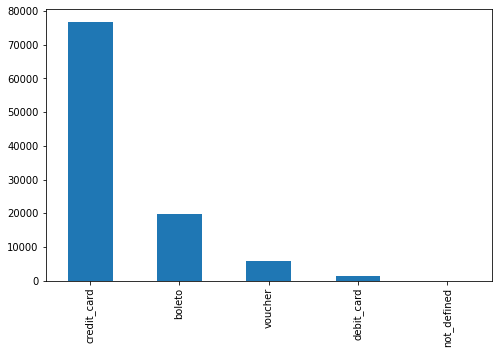

In [ ]:
order_payments['payment_type'].value_counts().plot.bar(figsize=(8,5))

****

In [ ]:
# 7)) table (7)) order_items_dataset
order_items=order_items_dataset=pd.read_sql("select * from order_items_dataset ", conn)
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [ ]:
order_items['shipping_limit_date']=pd.to_datetime(order_items['shipping_limit_date'])
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [ ]:
order_items.isna().any()

order_id               False
order_item_id          False
product_id             False
seller_id              False
shipping_limit_date    False
price                  False
freight_value          False
dtype: bool

In [ ]:
order_items.loc[:,'price'].describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

In [ ]:
order_items['shipping_limit_date']=pd.to_datetime(order_items['shipping_limit_date'])
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [ ]:
# 8))) table (8)  geolocation_dataset
geolocation=geolocation_dataset=pd.read_sql("select * from geolocation_dataset ", conn)
geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


# **ici montre que sao paulo où il y a plus des ventes **

In [ ]:
geolocation["geolocation_state"].value_counts()

SP    404268
MG    126336
RJ    121169
RS     61851
PR     57859
SC     38328
BA     36045
GO     20139
ES     16748
PE     16432
DF     12986
MT     12031
CE     11674
PA     10853
MS     10431
MA      7853
PB      5538
RN      5041
PI      4549
AL      4183
TO      3576
SE      3563
RO      3478
AM      2432
AC      1301
AP       853
RR       646
Name: geolocation_state, dtype: int64

In [ ]:
geolocation["geolocation_state"].value_counts(normalize=True)*100

SP    40.420212
MG    12.631541
RJ    12.114925
RS     6.184092
PR     5.784957
SC     3.832175
BA     3.603913
GO     2.013572
ES     1.674527
PE     1.642932
DF     1.298388
MT     1.202904
CE     1.167210
PA     1.085123
MS     1.042930
MA     0.785172
PB     0.553710
RN     0.504018
PI     0.454826
AL     0.418232
TO     0.357542
SE     0.356242
RO     0.347743
AM     0.243160
AC     0.130079
AP     0.085286
RR     0.064589
Name: geolocation_state, dtype: float64

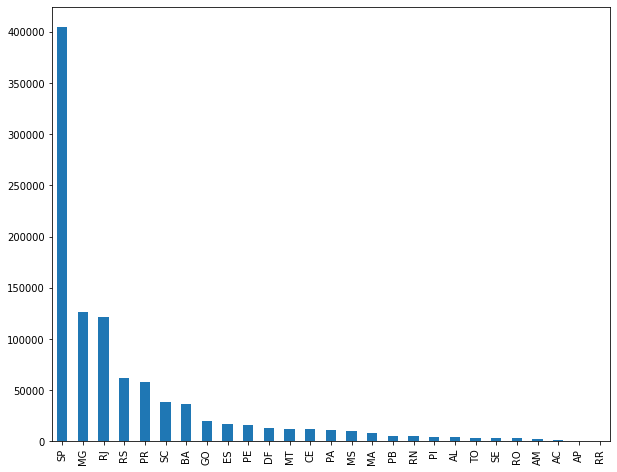

In [ ]:
geolocation["geolocation_state"].value_counts().plot.bar(figsize=(10,8))

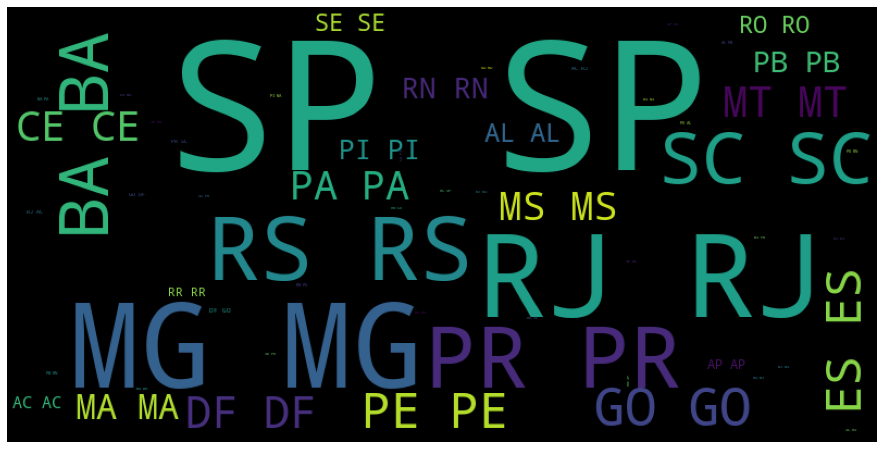

In [ ]:
from wordcloud import WordCloud
words = ' '.join((i for i in geolocation.geolocation_state.dropna().str.replace(';', ' ').str.replace(',', ' ')))

wc = WordCloud( width=800, height=400, background_color='black').generate(words)

plt.figure(figsize=(16,8))
plt.axis("off")
plt.grid(False)
plt.imshow(wc);

**le siege d'olist à parana *PR**///////

**sp sao paulo ,,, MG  Minas Gerais,,,, RJ rio de jainero**
plus des commande dans le sud est 
//////**moins des commande dans le nord AC acre AP amapa  RR roraima:: **


In [ ]:
state_grp= geolocation.groupby(["geolocation_state"])
state_grp
state_grp.get_group('SP')



,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
404265,19970,-22.779062,-50.218287,palmital,SP
404266,19905,-22.997601,-49.885928,ourinhos,SP
404267,19907,-22.978498,-49.875919,ourinhos,SP
404268,19905,-22.993127,-49.887665,ourinhos,SP


# Semaine 2 : Organisation ("tables intermédiaires")

Avant de répondre à la demande du PDG d'Olist, nous devons rechercher les causes d'un mauvais `review_score`.

Une bonne pratique pour ce genre de problème est de construire plusieurs tables intermédiaires, chacune contenant un unique_id et les informations pertinentes pour cette table.  

Par exemple :

* table des commandes (id, review_score, montant, distance entre le vendeur et le client...)
* table des vendeurs (id, note moyenne par vendeur, temps d'attente moyen, ...)
* table des produits : (id, score moyen d'avis, catégories, couleurs, tailles...)
* table des clients (id, quelques propriétés de ce client)
* table des avis (id, texte traduit, propriétés de ce texte...)

Une fois que tu sera satisfait de tes tables intermédiaires imaginés, tu pourras dans un premier temps exporter les tables de données .sql en fichier .csv, avant de les créer avec le langage Pandas. Tu fera ensuite ton analyse en te servant de ces tables intermédiaires.





# Idées tables intermédiaires


Dans un premier temps, réfléchis avec ton groupe en observant le schéma de la base de données que tu as fait plus haut. Quelles sont les tables intermédiaires à créer pour proposer une analyse consise et pertinente en s'appuyant sur ses dernières ?
Vous pouvez, individuellement ou en groupe, réfléchir à ses tables intermédiaires.
Lundi matin, nous échangerons tous ensemble sur vos idées de tables intermédiaires.


***création d'une table (merge))***

###**Fusionner les données** 

Tous les ensembles de données précédents seront fusionnés en un seul et incluront toutes les colonnes nécessaires pour LES ANALYSE DES DONNées

In [ ]:
data_merge = pd.merge(customers, orders, on="customer_id")
data_merge = data_merge.merge(order_reviews, on="order_id")
data_merge = data_merge.merge(order_items, on="order_id")
data_merge = data_merge.merge(products, on="product_id")
data_merge = data_merge.merge(order_payments, on="order_id")
data_merge = data_merge.merge(sellers, on='seller_id')
data_merge = data_merge.merge(product_category_name_translation	, on='product_category_name')
data_merge

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_width_cm,product_volume_cm3,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,31.0,107136.0,1,credit_card,2,146.87,8577,itaquaquecetuba,SP,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,31.0,107136.0,1,credit_card,1,275.79,8577,itaquaquecetuba,SP,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,31.0,107136.0,1,credit_card,1,275.79,8577,itaquaquecetuba,SP,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,31.0,107136.0,1,credit_card,7,140.61,8577,itaquaquecetuba,SP,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,31.0,107136.0,1,credit_card,10,137.58,8577,itaquaquecetuba,SP,office_furniture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114909,e548277911829ffe81aac2b4407de701,a0abd26659c9914690cbd3320d39fd96,92412,canoas,RS,a5f8439f1e560659a492608e370ecde2,delivered,2017-05-27 14:03:20,2017-05-27 14:15:16,2017-05-29 09:30:43,...,55.0,45375.0,1,credit_card,10,232.19,89701,concordia,SC,la_cuisine
114910,0fbd856ba1d4961786fb54bd448eb7fe,96328ac15f58fbb232fe14b182103382,89675,vargem bonita,SC,937592924b66482b823ee7ecd185d0ff,delivered,2018-03-31 19:17:43,2018-03-31 19:55:18,2018-04-02 19:10:46,...,43.0,74949.0,1,credit_card,8,426.70,89701,concordia,SC,la_cuisine
114911,aa0533eb31ed3be79086f11bb2bec430,a490d5875edefe9bb8f5101ec2f6b56f,13870,sao joao da boa vista,SP,e22a3e8048469ea68906f666d446c25c,delivered,2017-08-28 09:48:01,2017-08-28 10:05:04,2017-08-29 11:05:28,...,15.0,15120.0,1,credit_card,3,160.46,89701,concordia,SC,la_cuisine
114912,d11524bb77c28efad04e4467eac8a660,6968d41eb700f1ea39424e04b854bf7e,30130,belo horizonte,MG,1ce0acf125f1bcd636276dd213363196,delivered,2017-07-31 18:10:29,2017-07-31 18:25:20,2017-08-02 18:22:30,...,40.0,23800.0,1,credit_card,2,55.18,89701,concordia,SC,la_cuisine


In [ ]:
data_merge.to_csv("data_merge.csv")

In [ ]:
data_merge['order_id'].duplicated().sum()

18398

In [ ]:
data_merge['seller_id'].duplicated().sum()

111886

In [ ]:
data_merge.shape

(114914, 46)

In [ ]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114914 entries, 0 to 114913
Data columns (total 46 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    114914 non-null  object        
 1   customer_unique_id             114914 non-null  object        
 2   customer_zip_code_prefix       114914 non-null  int64         
 3   customer_city                  114914 non-null  object        
 4   customer_state                 114914 non-null  object        
 5   order_id                       114914 non-null  object        
 6   order_status                   114914 non-null  object        
 7   order_purchase_timestamp       114914 non-null  datetime64[ns]
 8   order_approved_at              114900 non-null  datetime64[ns]
 9   order_delivered_carrier_date   113727 non-null  datetime64[ns]
 10  order_delivered_customer_date  112534 non-null  datetime64[ns]
 11  

In [ ]:
data_merge.duplicated().sum()

0

je vais mettre describe pour voir la valeur moyenne ,min ,max 




In [ ]:
data_merge.describe()

,customer_zip_code_prefix,Year,review_score,review_score_2,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix
count,114914.000000,114914.000000,114914.000000,114914.000000,114914.000000,114914.000000,114914.000000,114914.000000,114914.000000,114914.000000,114913.000000,114913.000000,114913.000000,114913.000000,114913.000000,114914.000000,114914.000000,114914.000000,114914.000000
mean,35062.343117,2017.540291,4.034965,0.755522,1.193867,120.796428,20.070480,48.766243,786.805254,2.208086,2116.001897,30.300462,16.649813,23.106733,15406.571354,1.093200,2.942322,172.492040,24515.564640
std,29837.616042,0.504916,1.385039,0.429779,0.683964,183.018546,15.861444,10.035827,652.866698,1.719857,3783.898648,16.213752,13.479789,11.754655,23642.999537,0.727903,2.777360,266.353097,27636.859994
min,1003.000000,2016.000000,1.000000,0.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,168.000000,1.000000,0.000000,0.000000,1001.000000
25%,11312.500000,2017.000000,4.000000,1.000000,1.000000,39.900000,13.080000,42.000000,347.000000,1.000000,300.000000,18.000000,8.000000,15.000000,2860.000000,1.000000,1.000000,60.950000,6429.000000
50%,24241.000000,2018.000000,5.000000,1.000000,1.000000,74.900000,16.320000,52.000000,601.000000,1.000000,700.000000,25.000000,13.000000,20.000000,6664.000000,1.000000,2.000000,108.120000,13660.000000
75%,58706.750000,2018.000000,5.000000,1.000000,1.000000,134.900000,21.220000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,18576.000000,1.000000,4.000000,189.475000,28615.000000
max,99980.000000,2018.000000,5.000000,1.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,296208.000000,29.000000,24.000000,13664.080000,99730.000000


***le score moyenne de customers (( customers rating = 4.03))***
5 =57328,
4  =19142,
1  =11424,
3 =  8179,
2=   3151,
Name: review_score, dtype: int64


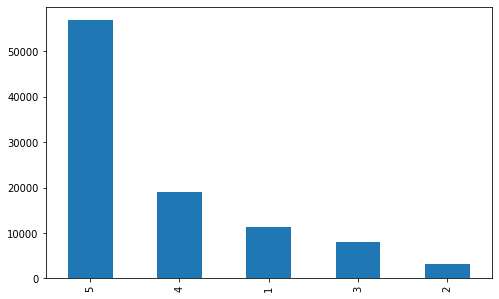

In [ ]:
import matplotlib.pyplot as plt
order_reviews['review_score'].value_counts().plot.bar(figsize=(8,5))

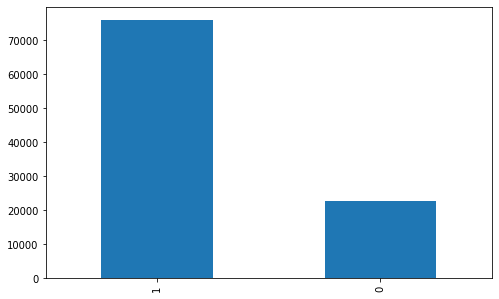

In [ ]:
import matplotlib.pyplot as plt
order_reviews['review_score_2'].value_counts().plot.bar(figsize=(8,5))

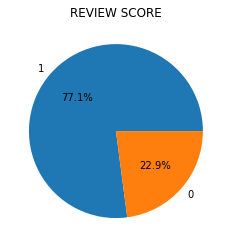

In [ ]:
import matplotlib.pyplot as plt
orders_reviews=order_reviews['review_score_2'].value_counts(normalize=True)*100
labels=[1,0]
plt.pie(orders_reviews,labels=labels,autopct='%1.1f%%' )
plt.title("REVIEW SCORE")
plt.show()

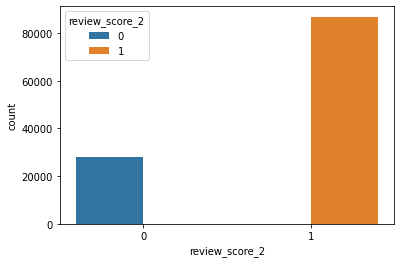

In [ ]:
sns.countplot(data=data_merge,x='review_score_2',hue='review_score_2')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


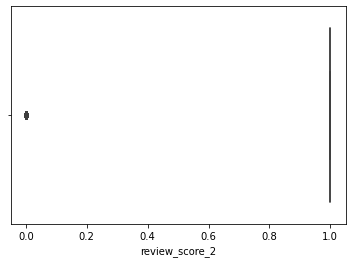

In [ ]:
sns.boxplot( data_merge["review_score_2"] )
plt.show()

## **Au début j'ai créer des nouveaux colonnes de ((order_purchase_timestamp)) day(jour) et month (mois) year-month  pour connaitre quel jours et quel mois il y a plus des commandes  **







In [ ]:
# Import seaborn
import seaborn as sns

In [ ]:
print("les données sont colléctées à partir de la date {} jusqu'au {}".format(
    data_merge.order_purchase_timestamp.min(),data_merge.order_purchase_timestamp.max()))

les données sont colléctées à partir de la date 2016-09-04 21:15:19 jusqu'au 2018-09-03 09:06:57


In [ ]:
"""from calendar import month_name

sorted('month')
import calendar
"""
# sorting data frame by order_month
#data_merge.sort_values(calendar.month_name, inplace = True)


"from calendar import month_name\n\nsorted('month')\nimport calendar\n"

Text(0.5, 1.0, 'Totale vendus des mois chaque année')

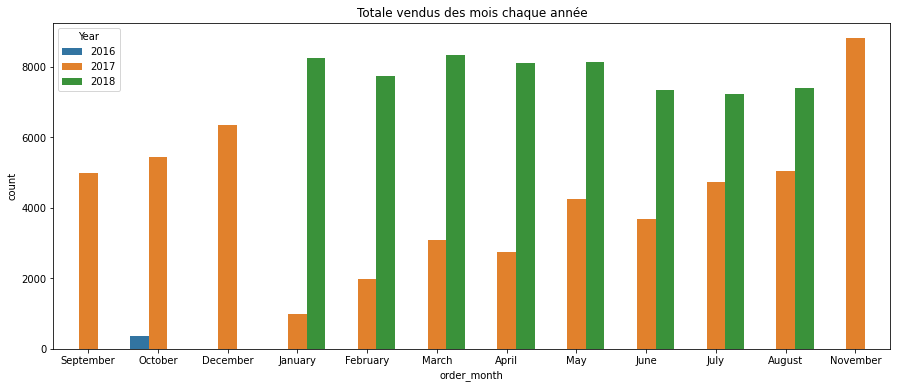

In [ ]:
data_merge.sort_values("order_purchase_timestamp",inplace=True)
# Filter data_merge dates
#data_merge= data_merge.loc[(data_merge['order_purchase_timestamp'] >= '2017-01-01')]
#data_merge
plt.figure(figsize=(15,6))
sns.countplot(data=data_merge,x='order_month',hue='Year')
plt.title('Totale vendus des mois chaque année')

Text(0.5, 1.0, 'Totale vendus des mois chaque année')

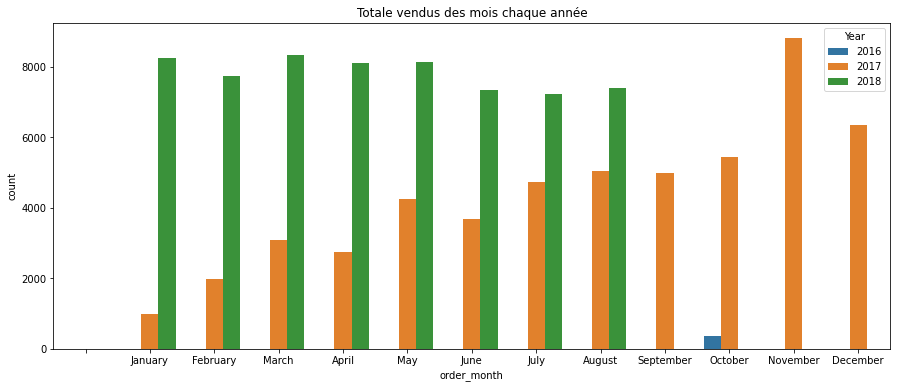

In [ ]:
import calendar
data_merge.sort_values("order_purchase_timestamp",inplace=True)
# Filter data_merge dates
#data_merge= data_merge.loc[(data_merge['order_purchase_timestamp']]
#data_merge
plt.figure(figsize=(15,6))
sns.countplot(data=data_merge,x='order_month',hue='Year',order=list(calendar.month_name))
plt.title('Totale vendus des mois chaque année')

Text(0.5, 1.0, 'Total des produits vendus quotidiennement chaque année')

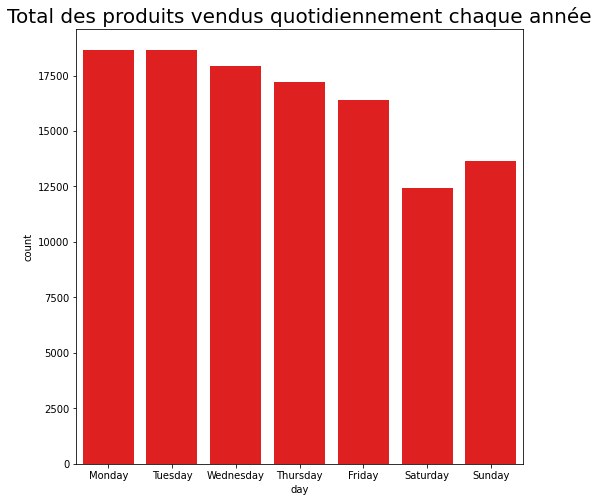

In [ ]:
import calendar
ax=plt.figure(figsize=(8,8))
sns.countplot(data=data_merge,x='day',color='red',order=list(calendar.day_name))
plt.title('Total des produits vendus quotidiennement chaque année', fontsize=20)


**Remarque; je peux montrer que les brésiliens achètent plus le lundi ou mardi plus que le weekend **

**Combien de produits ont été vendus dans chaque catégorie de produits ?**

In [ ]:
product_category = data_merge.groupby('product_category_name_english').agg(total_catégorie_produits_vendus=('product_category_name_english', 'count')).reset_index()
product_category


,product_category_name_english,total_catégorie_produits_vendus
0,agro_industry_and_commerce,252
1,air_conditioning,297
2,art,217
3,arts_and_craftmanship,24
4,audio,376
...,...,...
66,stationery,2599
67,tablets_printing_image,85
68,telephony,4687
69,toys,4238


** La colonne "total_catégorie_produits_vendus" nous informe du nombre de produits vendus dans chaque catégorie**





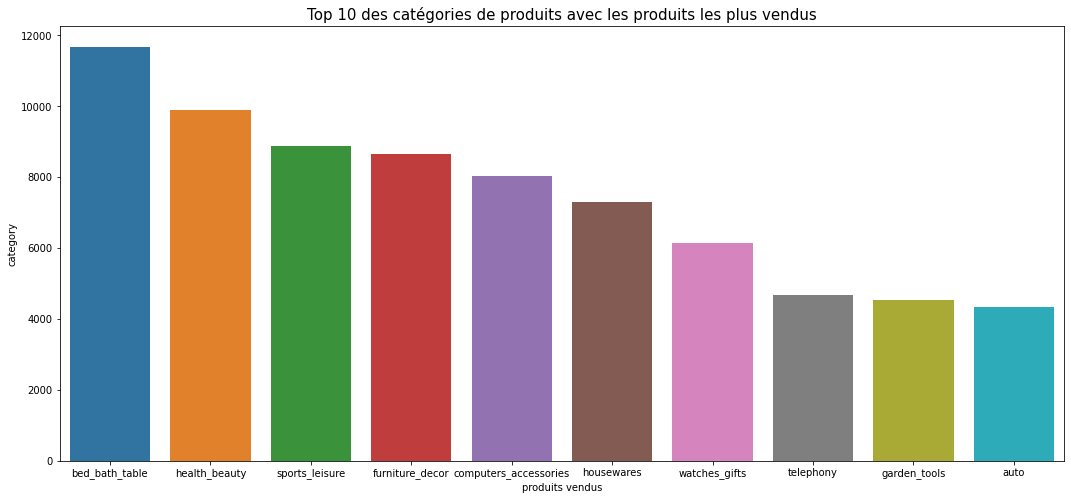

In [ ]:
top10_product_category = data_merge["product_category_name_english"].value_counts().head(10)
fig=plt.figure(figsize=(18,8))

sns.barplot(x=top10_product_category.index, y=top10_product_category.values)
plt.title('Top 10 des catégories de produits avec les produits les plus vendus',fontsize=15);
plt.xlabel('produits vendus',fontsize=10);
plt.ylabel('category',fontsize=10);

In [ ]:
product_category = data_merge.groupby('product_category_name_english').agg(total_catégorie_produits_vendus=('product_category_name_english', 'count')).reset_index()
product_category

,product_category_name_english,total_catégorie_produits_vendus
0,agro_industry_and_commerce,252
1,air_conditioning,297
2,art,217
3,arts_and_craftmanship,24
4,audio,376
...,...,...
66,stationery,2599
67,tablets_printing_image,85
68,telephony,4687
69,toys,4238


In [ ]:
top_product_score =data_merge.groupby('product_category_name_english')["review_score_2"].mean().sort_values(ascending=False).reset_index().head(10)
top_product_score

,product_category_name_english,review_score_2
0,cds_dvds_musicals,0.928571
1,costruction_tools_tools,0.900990
2,books_general_interest,0.875223
3,fashion_childrens_clothes,0.875000
4,flowers,0.870968
5,books_imported,0.854839
6,books_technical,0.853933
7,small_appliances_home_oven_and_coffee,0.846154
8,fashion_sport,0.833333
9,luggage_accessories,0.832614


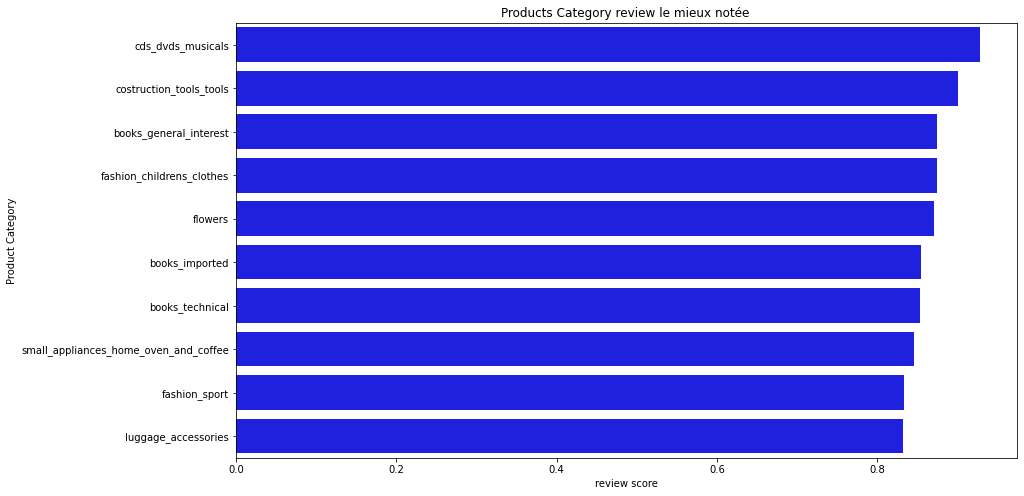

In [ ]:
fig=plt.figure(figsize=(14,8))
sns.barplot(data=top_product_score, x ='review_score_2' , y = 'product_category_name_english', color ='blue')
plt.title('Products Category review le mieux notée ')
plt.xlabel('review score')
plt.ylabel('Product Category');

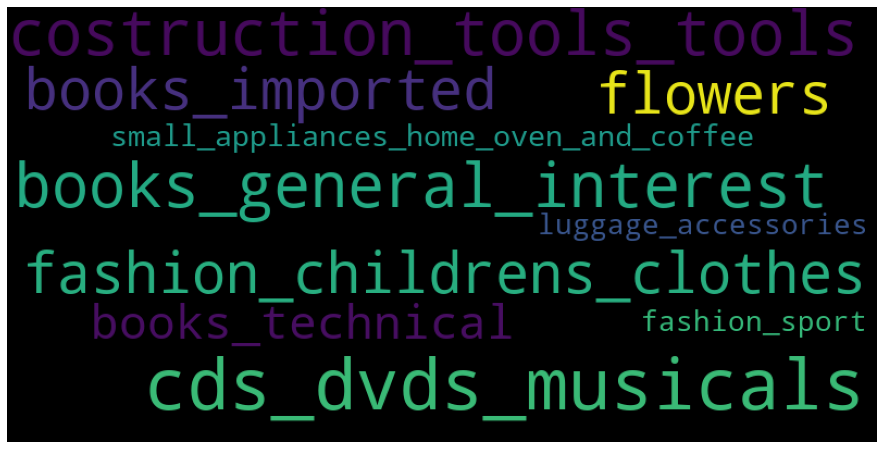

In [ ]:
words = ' '.join((i for i in top_product_score.product_category_name_english.dropna().str.replace(';', ' ').str.replace(',', ' ')))

wc = WordCloud( width=800, height=400, background_color='black').generate(words)

plt.figure(figsize=(16,8))
plt.axis("off")
plt.grid(False)
plt.imshow(wc);

In [ ]:
product_score_top = data_merge.groupby(['product_category_name_english']).agg(count_review =("review_score_2",'count'),reviewscore=('review_score','mean')).sort_values(by='count_review',ascending=False).reset_index().head(10)
product_score_top



,product_category_name_english,count_review,reviewscore
0,bed_bath_table,11682,3.891885
1,health_beauty,9887,4.137554
2,sports_leisure,8883,4.106946
3,furniture_decor,8655,3.912421
4,computers_accessories,8037,3.936046
5,housewares,7306,4.060224
6,watches_gifts,6149,4.018052
7,telephony,4687,3.947941
8,garden_tools,4542,4.028842
9,auto,4335,4.063206


In [ ]:
prod_good_review=data_merge.groupby(['product_category_name_english','review_score_2']).agg(count_review =("review_score_2",'count')).sort_values(by='count_review',ascending=False).reset_index().head(20)
prod_good_review

,product_category_name_english,review_score_2,count_review
0,bed_bath_table,1,8279
1,health_beauty,1,7748
2,sports_leisure,1,6932
3,furniture_decor,1,6214
4,computers_accessories,1,5879
5,housewares,1,5553
6,watches_gifts,1,4598
7,garden_tools,1,3441
8,telephony,1,3425
9,bed_bath_table,0,3403


In [ ]:
prod_good_review=data_merge.groupby(['product_category_name_english','review_score_2']).agg(count_review =("review_score_2",'count')).sort_values(by='count_review',ascending=False).reset_index()
prod_good_review1=prod_good_review.groupby('review_score_2').head(10)
prod_good_review1


,product_category_name_english,review_score_2,count_review
0,bed_bath_table,1,8279
1,health_beauty,1,7748
2,sports_leisure,1,6932
3,furniture_decor,1,6214
4,computers_accessories,1,5879
5,housewares,1,5553
6,watches_gifts,1,4598
7,garden_tools,1,3441
8,telephony,1,3425
9,bed_bath_table,0,3403


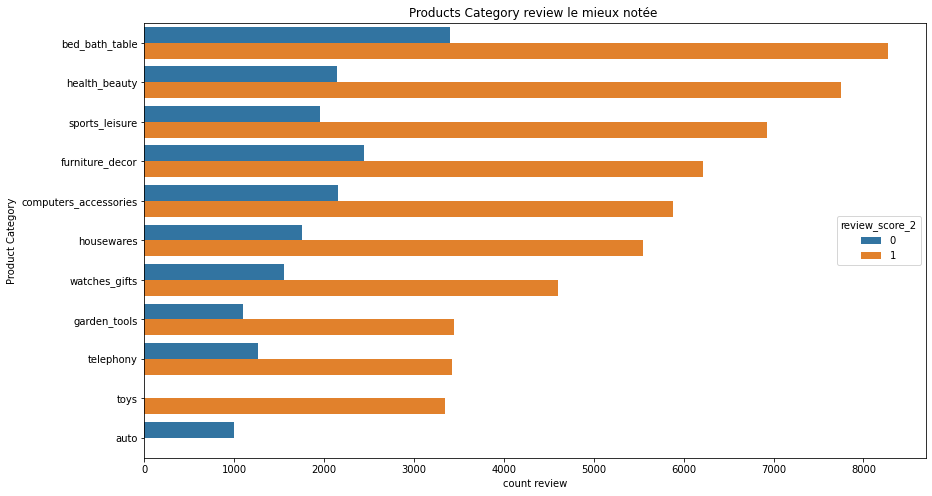

In [ ]:
fig=plt.figure(figsize=(14,8))
sns.barplot(data=prod_good_review1, x ='count_review' , y = 'product_category_name_english',hue='review_score_2')
plt.title('Products Category review le mieux notée ')
plt.xlabel('count review')
plt.ylabel('Product Category');

In [ ]:
prod_good_review1=prod_good_review[(prod_good_review['review_score_2']==1)]
prod_good_review1

,product_category_name_english,review_score_2,count_review
0,bed_bath_table,1,8279
1,health_beauty,1,7748
2,sports_leisure,1,6932
3,furniture_decor,1,6214
4,computers_accessories,1,5879
...,...,...,...
120,home_comfort_2,1,18
124,cds_dvds_musicals,1,13
128,la_cuisine,1,12
133,fashion_childrens_clothes,1,7


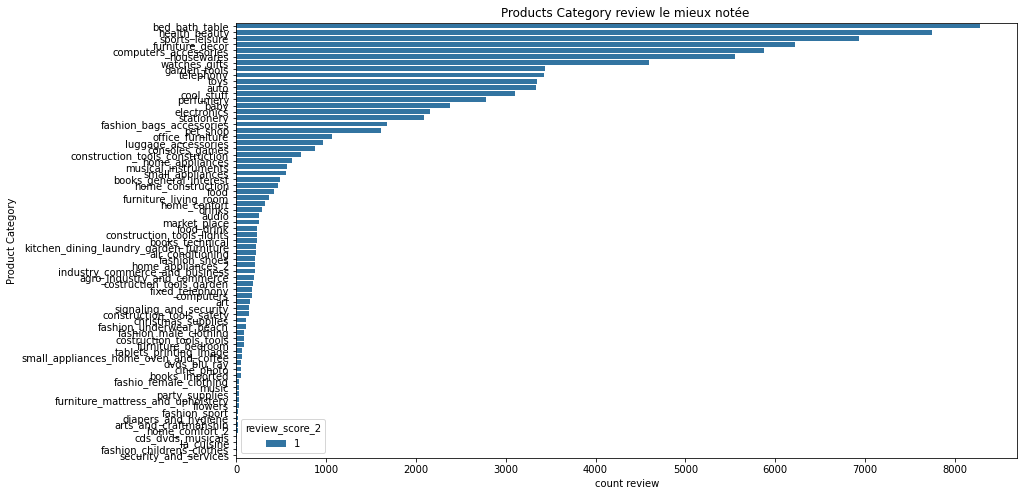

In [ ]:
fig=plt.figure(figsize=(14,8))
sns.barplot(data=prod_good_review1, x ='count_review' , y = 'product_category_name_english',hue='review_score_2')
plt.title('Products Category review le mieux notée ')
plt.xlabel('count review')
plt.ylabel('Product Category');

In [ ]:
totale_plus_review=data_merge.groupby(['product_category_name_english']).agg(count_review =("review_score_2",'count')).sort_values(by='count_review',ascending=False).reset_index().head(20)
totale_plus_review

,product_category_name_english,count_review
0,bed_bath_table,11682
1,health_beauty,9887
2,sports_leisure,8883
3,furniture_decor,8655
4,computers_accessories,8037
5,housewares,7306
6,watches_gifts,6149
7,telephony,4687
8,garden_tools,4542
9,auto,4335


In [ ]:
products_liste= totale_plus_review['product_category_name_english'].tolist()
products_liste

['bed_bath_table',
 'health_beauty',
 'sports_leisure',
 'furniture_decor',
 'computers_accessories',
 'housewares',
 'watches_gifts',
 'telephony',
 'garden_tools',
 'auto',
 'toys',
 'cool_stuff',
 'perfumery',
 'baby',
 'electronics',
 'stationery',
 'fashion_bags_accessories',
 'pet_shop',
 'office_furniture',
 'consoles_games']

In [ ]:
data = pd.DataFrame (products_liste, columns = ['product_category_name_english'])
print (data)

   product_category_name_english
0                 bed_bath_table
1                  health_beauty
2                 sports_leisure
3                furniture_decor
4          computers_accessories
5                     housewares
6                  watches_gifts
7                      telephony
8                   garden_tools
9                           auto
10                          toys
11                    cool_stuff
12                     perfumery
13                          baby
14                   electronics
15                    stationery
16      fashion_bags_accessories
17                      pet_shop
18              office_furniture
19                consoles_games


In [ ]:
data_prod_1=pd.merge(prod_good_review, 
         data, 
         how="inner", 
         left_on='product_category_name_english',
         right_on='product_category_name_english')
data_prod_1

,product_category_name_english,review_score_2,count_review
0,bed_bath_table,1,8279
1,bed_bath_table,0,3403
2,health_beauty,1,7748
3,health_beauty,0,2139
4,sports_leisure,1,6932
5,sports_leisure,0,1951
6,furniture_decor,1,6214
7,furniture_decor,0,2441
8,computers_accessories,1,5879
9,computers_accessories,0,2158


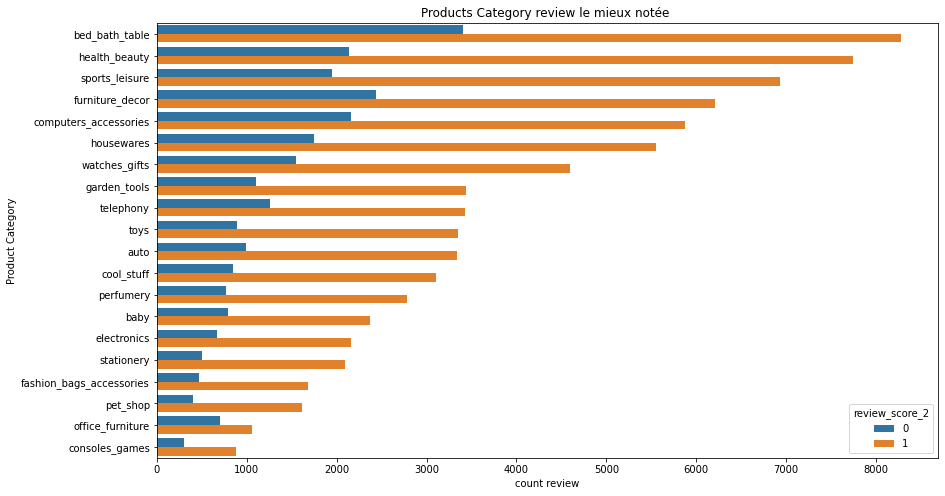

In [ ]:
fig=plt.figure(figsize=(14,8))
sns.barplot(data=data_prod_1, x ='count_review' , y = 'product_category_name_english',hue='review_score_2')
plt.title('Products Category review le mieux notée ')
plt.xlabel('count review')
plt.ylabel('Product Category');

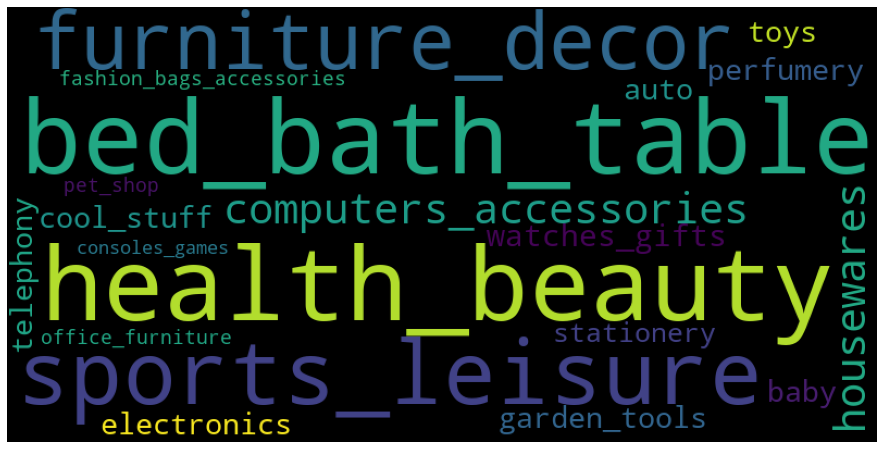

In [ ]:
from wordcloud import WordCloud
words = ' '.join((i for i in data_prod_1.product_category_name_english.dropna().str.replace(';', ' ').str.replace(',', ' ')))

wc = WordCloud( width=800, height=400, background_color='black').generate(words)

plt.figure(figsize=(16,8))
plt.axis("off")
plt.grid(False)
plt.imshow(wc);

In [ ]:
fig=plt.figure(figsize=(14,8))
sns.barplot(data=prod_max_review, x ='review_score' , y = 'product_category_name_english', color ='blue')
plt.title('Products Category review le mieux notée ')
plt.xlabel('review score')
plt.ylabel('Product Category');

NameError: ignored

<Figure size 1008x576 with 0 Axes>

In [ ]:
flop_product_score =data_merge.groupby('product_category_name_english')["review_score_2"].mean().sort_values(ascending=False).reset_index().tail(10)
flop_product_score

In [ ]:
words = ' '.join((i for i in flop_product_score.product_category_name_english.dropna().str.replace(';', ' ').str.replace(',', ' ')))

wc = WordCloud( width=800, height=400, background_color='black').generate(words)

plt.figure(figsize=(16,8))
plt.axis("off")
plt.grid(False)
plt.imshow(wc);

In [ ]:
fig=plt.figure(figsize=(14,8))
sns.barplot(data=flop_product_score, x ='review_score_2' , y = 'product_category_name_english', color ='blue')
plt.title('Products Category review le moins notée ')
plt.xlabel('Score Review')
plt.ylabel('Product Category');

In [ ]:
words = ' '.join((i for i in flop_product_score.product_category_name_english.dropna().str.replace(';', ' ').str.replace(',', ' ')))

wc = WordCloud( width=800, height=400, background_color='black').generate(words)

plt.figure(figsize=(16,8))
plt.axis("off")
plt.grid(False)
plt.imshow(wc);



> **Combien de temps faut-il pour terminer une commande ?**



In [ ]:
data_merge['difference_delivery'] = data_merge['order_estimated_delivery_date'] - data_merge['order_delivered_customer_date']
data_merge['difference_delivery'] = data_merge['difference_delivery'].dt.days


In [ ]:
data_merge.loc[: ,['product_photos_qty','product_length_cm','review_score','review_score_2']].corr()

In [ ]:
data_merge.info()

In [ ]:
diff_delivery_score=data_merge.loc[:,['difference_delivery','review_score','review_score_2']]
diff_delivery_score.head(5)

In [ ]:
diff_delivery_score.to_csv("diff_delivery_score.csv")


In [ ]:
diff_delivery_score.tail(5)

In [ ]:
fig=plt.figure(figsize=(8,6))

sns.barplot(data=diff_delivery_score,x='review_score' ,y='difference_delivery')
plt.title('difference delivery basé sur le review score',fontsize=15);
plt.xlabel('review score',fontsize=8);
plt.ylabel('difference_delivery',fontsize=8);

In [ ]:
fig=plt.figure(figsize=(8,6))

sns.barplot(data=diff_delivery_score,x='review_score_2' ,y='difference_delivery')
plt.title('difference delivery basé sur le review score',fontsize=15);
plt.xlabel('review score',fontsize=8);
plt.ylabel('difference_delivery',fontsize=8);

les  customers sont  satisfaits lorsque la livraison arrive plus tôt que prévu.
on peut voir par rapport score_review. 

In [ ]:
delivery_en_retard=data_merge.loc[data_merge['difference_delivery']<0]
delivery_en_retard.count

In [ ]:
delivery_en_retard=data_merge.loc[data_merge['difference_delivery']<0]


In [ ]:
diff_delivery_score.corr()

In [ ]:
sns.heatmap(diff_delivery_score.corr(),cmap="PiYG",annot=True)
plt.show()

je peux connaitre la moyenne que la commande soit delivrer aux clients

In [ ]:
#la Délai moyenne  des partenaires logistiques pour terminer une commande delivrée aux clients
commande_delivree_aux_clients=data_merge['difference_delivery'].mean()
commande_delivree_aux_clients



** difference entre la date de livraison et la date estimer de livraison; montre que olist fait un grand progrès pour que la commande arrive avant la date prévu**


**moyennement  la commande arrive 11 jours et 08heures avant la date prévu**

la figure au dessous 

In [ ]:
fig=plt.figure(figsize=(12,8))
sns.scatterplot(data=data_merge,x="price",y="difference_delivery",hue="review_score_2")# pas bon 
plt.title('difference delivery en fonction de prix',fontsize=15)
plt.xlabel("prix de l'article",fontsize=10)
plt.ylabel('difference_delivery',fontsize=10)
plt.show()

price : prix de l'article.
freight_value : valeur du fret de l'article (si une commande comporte plus d'un article, la valeur du fret est répartie entre les articles).

In [ ]:
fig=plt.figure(figsize=(12,8))
sns.scatterplot(data=data_merge,x="payment_value",y="difference_delivery",hue="review_score_2")# pas bon 
plt.title('difference delivery en fonction de payement',fontsize=15)
plt.xlabel("payement",fontsize=10)
plt.ylabel('difference_delivery',fontsize=10)
plt.show()

In [ ]:
fig=plt.figure(figsize=(10,8))
sns.scatterplot(data=data_merge,x="price",y="freight_value",hue="review_score_2")# pas bon 
plt.title('freight value en fonction de prix',fontsize=15)
plt.xlabel("prix de l'article",fontsize=10)
plt.ylabel('valeur de freight',fontsize=10)
plt.show()

In [ ]:
data_merge.loc[:,["price","freight_value"]].corr()


In [ ]:
sns.regplot("price","freight_value", data = data_merge)
plt.show()

#### **la difference entre la réponse et la création des avis**

In [ ]:
#la délai moyenne de la réponse de clients après avoir réçu un émail
data_merge['reponse_de_client']=data_merge['review_answer_timestamp'] - data_merge['review_creation_date']
data_merge


**la délai moyenne pour un customers répond aux questions c'est des 3 jours et de 03heure**

**description lentgh payment  value **

In [ ]:
sns.regplot('payment_value','product_description_lenght', data=data_merge)
plt.show()


**il y a une correlation positif entre product discription lenght et payment value **

In [ ]:
data1=data_merge.loc[:,['price','review_score_2','freight_value','payment_value','product_weight_g','product_volume_cm3','product_description_lenght']]
data2=data1.sample(frac = 0.2, random_state = 24)
sns.pairplot(data2, hue='review_score_2')

In [ ]:
#sns.heatmap(df_weather.corr(),cmap="PiYG",annot=True)
#plt.show()
sns.heatmap(data1.corr(),cmap="PiYG",annot=True)
plt.show()


In [ ]:
data_merge.columns

**Combien de produits ont été vendus par chaque vendeur ?**

In [ ]:
la_production_totale = data_merge.groupby('seller_id').agg(total_products_sold_seller = ('order_item_id', 'sum')).sort_values("total_products_sold_seller",ascending=False).reset_index().head(10)
la_production_totale

In [ ]:
df_seller_review=data_merge.merge(la_production_totale, on='seller_id')
df_seller_review.loc[:,["seller_id","total_products_sold_seller","review_score","review_score_2","seller_state"]]

In [ ]:
data_commentaire=order_reviews[["review_score_2","review_comment_title","review_comment_message"]]
data_commentaire

**je cherche les commentaire les plus cité ** **(recommandé ,très bien)**
j'ai changé tout les commentaire en majuscule parceque python sensible à la casse .
#data['Name'] = data['Name'].str.upper()
order_reviews["review_comment_title"]=order_reviews["review_comment_title"].str.upper()
order_reviews["review_comment_message"]=order_reviews["review_comment_message"].str.upper()


In [ ]:
order_reviews.loc[:,["review_comment_title"]].value_counts().idxmax()

In [ ]:
order_reviews.loc[:,["review_comment_message"]].value_counts().idxmax()

In [ ]:
order_reviews.loc[:,["review_comment_title"]].value_counts()

In [ ]:
from wordcloud import WordCloud
words = ' '.join((i for i in order_reviews.review_comment_title.dropna().str.replace(';', ' ').str.replace(',', ' ')))

wc = WordCloud( width=800, height=400, background_color='black').generate(words)

plt.figure(figsize=(16,8))
plt.axis("off")
plt.grid(False)
plt.imshow(wc);

In [ ]:
order_reviews.loc[:,["review_comment_message"]].value_counts()

In [ ]:
from wordcloud import WordCloud
words = ' '.join((i for i in order_reviews.review_comment_message.dropna().str.replace(';', ' ').str.replace(',', ' ')))

wc = WordCloud( width=800, height=400, background_color='black').generate(words)

plt.figure(figsize=(16,8))
plt.axis("off")
plt.grid(False)
plt.imshow(wc);

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = order_reviews.review_comment_message
wordcloud = WordCloud(
    width = 800,
    height = 400,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(figsize = (12, 8)) #, facecolor = 'k',edgecolor = 'k')
plt.imshow(wordcloud)     #, interpolation = 'bilinear')
plt.axis('off')
plt.grid(False)
#plt.tight_layout(pad=0)
plt.show()

**nuage des points **

In [ ]:
"""
from requests.models import to_key_val_list
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in ["review_comment_message"].content:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()
"""

**Customers review**

In [ ]:
customer_review =data_merge.groupby('customer_id')["review_score_2"].mean().reset_index()
customer_review


In [ ]:
customer_plus_ordered =data_merge.groupby('customer_id')["order_id"].count().sort_values(ascending=False).rename("commande totale").reset_index().head(20)
customer_plus_ordered

In [ ]:
df_customer_review=data_merge.merge(customer_plus_ordered,on='customer_id')
df_customer_review.loc[:, ['customer_id','commande totale','review_score_2','review_score','customer_state']]

**les listes des états au brésil**
**https://www.brasilbresil.com/article-les-etats-du-bresil/#:~:text=aussi%20%E2%80%93%20Carte%20br%C3%A9sil-,Amazonas%2C%20sigle%20AM,Elle%20compte%2062%20municipalit%C3%A9s.**

In [ ]:
customer_score_top =data_merge.groupby('customer_state')["review_score_2"].mean().sort_values(ascending=False).reset_index().head(10)
customer_score_top

In [ ]:
fig=plt.figure(figsize=(12,8))

sns.barplot(data=customer_score_top,x='review_score_2' ,y='customer_state')
plt.title('top state basé sur le review score',fontsize=15);
plt.xlabel('review score',fontsize=10);
plt.ylabel('customer_state',fontsize=10);

In [ ]:
customer_score_flop =data_merge.groupby('customer_state')["review_score_2"].mean().sort_values(ascending=False).reset_index().tail(10)
customer_score_flop

In [ ]:
fig=plt.figure(figsize=(12,8))

sns.barplot(data=customer_score_flop,x='review_score_2' ,y='customer_state')
plt.title('flop state basé sur le review score',fontsize=15);
plt.xlabel('review score',fontsize=10);
plt.ylabel('customer_state',fontsize=10);

In [ ]:
fig=plt.figure(figsize=(18,8))

sns.barplot(data=data_merge,y='review_score_2' ,x='customer_state')
plt.title('tous les états de clients basé sur le review score',fontsize=15)
plt.xlabel('customer_state',fontsize=10)
plt.ylabel('review score',fontsize=10)

montre plus de customer bien note à AP(((Amapá (AP) : l'Etat de l'extrême Nord du Brésil))

seller sate avec leur score

In [ ]:
seller_review_top =data_merge.groupby('seller_state')["review_score_2"].mean().sort_values(ascending=False).reset_index().head(10)
seller_review_top

In [ ]:
fig=plt.figure(figsize=(12,8))

sns.barplot(data=seller_review_top,x='review_score_2' ,y='seller_state')
plt.title('top state seller basé sur le review score',fontsize=15);
plt.xlabel('review score',fontsize=10);
plt.ylabel('seller_state',fontsize=10);

In [ ]:
seller_review_flop =data_merge.groupby('seller_state')["review_score_2"].mean().sort_values(ascending=False).reset_index().tail(10)
seller_review_flop

In [ ]:
fig=plt.figure(figsize=(12,8))

sns.barplot(data=seller_review_flop,x='review_score_2' ,y='seller_state')
plt.title('flop seller state basé sur le review score',fontsize=15);
plt.xlabel('review score',fontsize=10);
plt.ylabel('seller_state',fontsize=10);

In [ ]:
fig=plt.figure(figsize=(12,8))

sns.barplot(data=data_merge,y='review_score_2' ,x='seller_state')
plt.title('seller state basé sur le review score',fontsize=15);
plt.xlabel('seller_state',fontsize=10);
plt.ylabel('review score',fontsize=10)

**il faut que olist aide les vendeur des état de  Amazonas (AM) pour ameliorer leurs services pour avoir des bonnes notes (bon score review)**

**par rapport à la type de payement **

In [ ]:
order_payments['payment_type'].value_counts().plot.bar(figsize=(8,5))

In [ ]:
type_payment_review =data_merge.groupby('payment_type')["review_score_2"].mean().sort_values(ascending=False).reset_index()
type_payment_review

In [ ]:
fig=plt.figure(figsize=(16,6))

sns.barplot(data=type_payment_review,y='review_score_2' ,x='payment_type',hue='review_score_2')
plt.title('type de payemenr basé sur le review score',fontsize=15);
plt.xlabel('type de payment',fontsize=10);
plt.ylabel('review_score',fontsize=10);

In [ ]:
fig=plt.figure(figsize=(12,8))
sns.countplot(data=data_merge,x='payment_type',hue='review_score_2')



**order_delivered_carrier_date : indique l'horodatage de la commande, c'est-à-dire la date à laquelle elle a été remise au partenaire logistique**
**shipping_limit_date : indique la date limite d'expédition du vendeur pour le transfert de la commande au partenaire logistique.**

In [ ]:
"""data_merge['diff_logistique_seller']=data_merge['shipping_limit_date']-data_merge['order_delivered_carrier_date']
#data_merge['difference_delivery'] = data_merge['difference_delivery'].dt.days
data_merge['diff_logistique_seller'] = data_merge['diff_logistique_seller'].dt.days
data_merge['diff_logistique_seller']"""

In [ ]:
#data_merge.loc[:,['diff_logistique_seller','seller_state']].head(5)


In [ ]:
#data_merge.groupby('diff_logistique_seller')['seller_state']

In [ ]:
#data_merge.loc[:,['diff_logistique_seller',"difference_delivery","review_score_2"]].corr() # pas bon

**Zied: Les vendeurs avec le plus de volume de ventes ont-ils des meilleures critiques ?**

In [ ]:
la_production_totale = data_merge.groupby(['seller_id','review_score_2','seller_state']).agg(total_products_sold_seller = ('product_id', 'sum'),price_totale=('price','sum')).sort_values("price_totale",ascending=False).reset_index()
la_production_totale


In [ ]:
la_production_totale.loc[la_production_totale['seller_id']=='77128dec4bec4878c37ab7d6169d6f26']

In [ ]:
fig=plt.figure(figsize=(14,8))
sns.barplot(data=la_production_totale, y ='seller_id' , x = 'price_totale')
plt.title('Products Category review le mieux notée ')
plt.xlabel('price_totale')
plt.ylabel('seller_id');

In [ ]:
#la_production_totale_2=la_production_totale_1.loc[(la_production_totale_1['review_score_2']==1)]
#la_production_totale_2

In [ ]:
fig=plt.figure(figsize=(14,8))
sns.barplot(data=la_production_totale_2, y ='seller_id' , x = 'total_products_sold_seller',hue='review_score_2')
plt.title('Products Category review le mieux notée ')
plt.xlabel('product review')
plt.ylabel('seller_id');

In [ ]:
customer_good_review=data_merge.groupby(['customer_state','review_score_2']).agg(count_review =("review_score_2",'count')).sort_values(by='count_review',ascending=False).reset_index().head(40)
customer_good_review

In [ ]:
#customer_good_review=data_merge.groupby(['customer_state','review_score_2']).agg(count_review =("review_score_2",'count')).sort_values(by='count_review',ascending=False).reset_index().head(20)
#customer_good_review
#customer_good_review1=prod_good_review.groupby('review_score_2').head(10)
#customer_good_review1
customer_liste=customer_good_review['customer_state'].tolist()
customer_liste

In [ ]:
customer_liste = list(set(customer_liste))
print(customer_liste)

In [ ]:
data_customer = pd.DataFrame (customer_liste, columns = ['customer_state'])
print (data_customer)

In [ ]:
data_customer_1=pd.merge(customer_good_review, 
         data_customer, 
         how="inner", 
         left_on='customer_state',
         right_on='customer_state')
data_customer_1

In [ ]:
fig=plt.figure(figsize=(14,8))
sns.barplot(data=data_customer_1, x='count_review',y='customer_state',hue='review_score_2')
plt.title('customer review le mieux notée ')
plt.xlabel('count review')
plt.ylabel('customer_state');

In [ ]:
fig=plt.figure(figsize=(14,8))
sns.barplot(data=data_customer_1, x='count_review',y='customer_state',hue='')
plt.title('customer review le mieux notée ')
plt.xlabel('count review')
plt.ylabel('customer_state');
# plot
ax = sns.countplot(x="class", hue="who", data=data)
ax.set(ylabel='Bar Count', title='Bar Count and Percent of Total')

# add annotations
for c in ax.containers:
    
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{h/data_customer_1.review_score_2.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='edge')

plt.show()

**changer en csv**

In [ ]:
data_merge.to_csv("data_merge.csv")

In [ ]:

review1=data_merge.groupby(['review_score']).agg(count_review =("review_score_2",'count')).sort_values(by='review_score',ascending=True).reset_index()
review1

In [ ]:
review1['cost_per']=[100,50,40,0,0]
review1
 


In [ ]:
review1['cost_per_realbre']=review1['cost_per']*review1['count_review']
review1

In [ ]:

review1.to_csv("review1.csv")